Dataset Loaded Successfully! Using: Iris Dataset (as replacement)
Shape: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   fare_amount  
0            0  
1            0  
2            0  
3            0  
4            0  

After Cleaning: (150, 5)

--- Basic Statistics ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000     

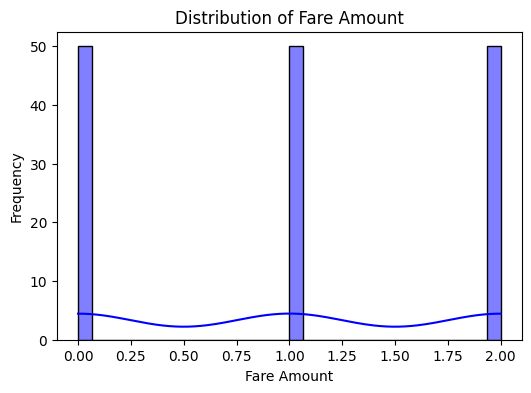

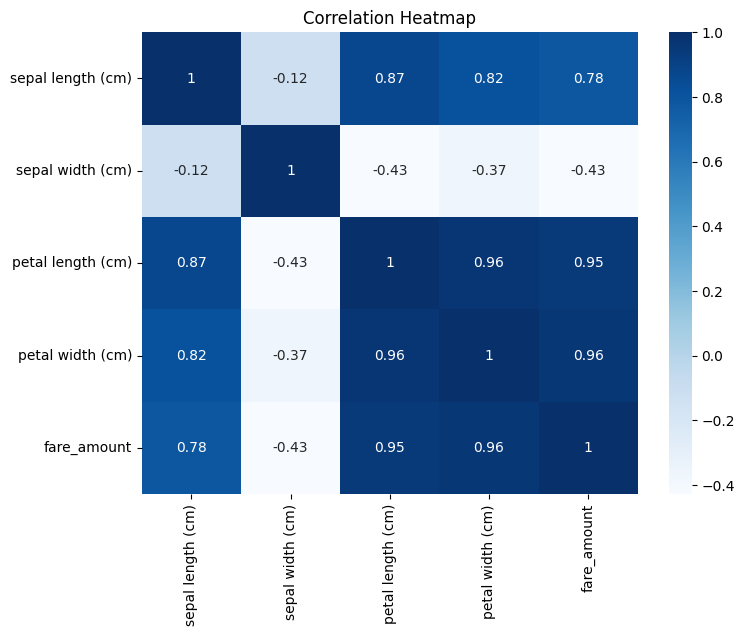


PCA reduced dataset to 2 components, explaining 95.81% variance

--- Model Performance Comparison ---
         Model  R² Score       MAE      RMSE
0  Without PCA  0.946896  0.146377  0.192649
1     With PCA  0.905880  0.189928  0.256475


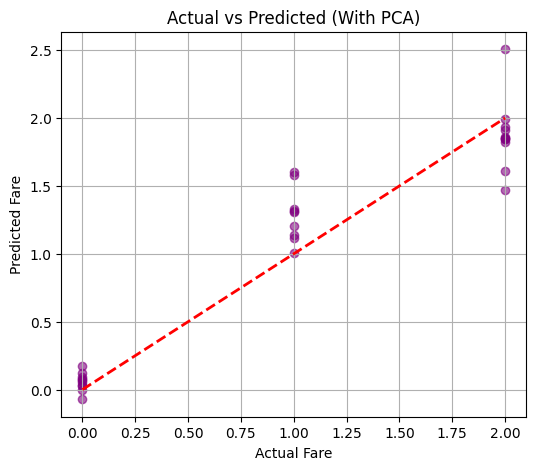

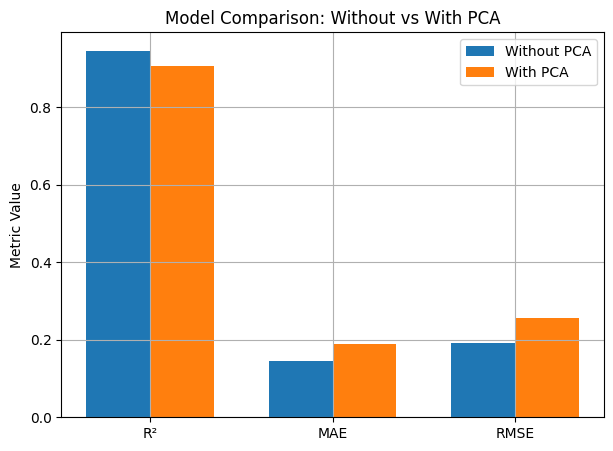

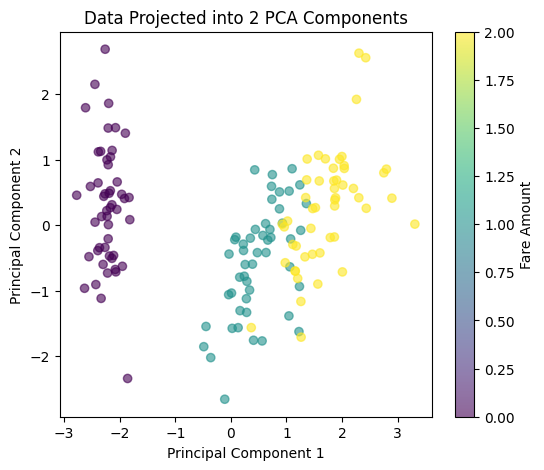

In [ ]:
#ASS9. Uber Ride Price Prediction using PCA and EDA: Dataset can be change(iris dataset)
#● Perform Exploratory Data Analysis (EDA) on Uber ride data
#● Use Principal Component Analysis (PCA) to reduce dimensionality
#● Compare the performance of models with and without PCA

# ===============================================================
# Uber Ride Price Prediction using PCA and EDA
# Compare model performance WITH vs WITHOUT PCA
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------------
try:
    df = pd.read_xlsx("UberDataset.xlsx")
    dataset_used = "Uber Ride Dataset"
except:
    from sklearn.datasets import load_iris
    iris = load_iris(as_frame=True)
    df = iris.frame
    df["fare_amount"] = df["target"]
    df.drop(columns=["target"], inplace=True)
    dataset_used = "Iris Dataset (as replacement)"

print(f"Dataset Loaded Successfully! Using: {dataset_used}")
print("Shape:", df.shape)
print(df.head())

# ---------------------------------------------------------------
# 2. Data Cleaning (Uber dataset specific)
# ---------------------------------------------------------------
if "pickup_longitude" in df.columns:
    df = df.dropna()
    df = df[
        (df["pickup_longitude"] != 0) &
        (df["pickup_latitude"] != 0) &
        (df["dropoff_longitude"] != 0) &
        (df["dropoff_latitude"] != 0)
    ]
    df = df[(df["fare_amount"] > 0) & (df["fare_amount"] < 100)]
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors='coerce')
    df["hour"] = df["pickup_datetime"].dt.hour
    df["month"] = df["pickup_datetime"].dt.month
    df["year"] = df["pickup_datetime"].dt.year
    df = df.drop(columns=["key", "pickup_datetime"], errors="ignore")

print("\nAfter Cleaning:", df.shape)

# ---------------------------------------------------------------
# 3. EDA (Exploratory Data Analysis)
# ---------------------------------------------------------------
print("\n--- Basic Statistics ---")
print(df.describe())

plt.figure(figsize=(6,4))
sns.histplot(df["fare_amount"], bins=30, kde=True, color='blue')
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

if "passenger_count" in df.columns:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df["passenger_count"], y=df["fare_amount"], alpha=0.6)
    plt.title("Passenger Count vs Fare Amount")
    plt.xlabel("Passenger Count")
    plt.ylabel("Fare Amount")
    plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------------------------------------------
# 4. Split features and target
# ---------------------------------------------------------------
X = df.drop(columns=["fare_amount"])
y = df["fare_amount"]

# ---------------------------------------------------------------
# 5. Scale features
# ---------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------------------
# 6. Model 1 - Without PCA
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lr_no_pca = LinearRegression()
lr_no_pca.fit(X_train, y_train)
y_pred_no_pca = lr_no_pca.predict(X_test)

r2_no_pca = r2_score(y_test, y_pred_no_pca)
mae_no_pca = mean_absolute_error(y_test, y_pred_no_pca)
rmse_no_pca = np.sqrt(mean_squared_error(y_test, y_pred_no_pca))

# ---------------------------------------------------------------
# 7. Model 2 - With PCA
# ---------------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.sum(pca.explained_variance_ratio_) * 100
print(f"\nPCA reduced dataset to 2 components, explaining {explained_variance:.2f}% variance")

Xp_train, Xp_test, yp_train, yp_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

lr_pca = LinearRegression()
lr_pca.fit(Xp_train, yp_train)
y_pred_pca = lr_pca.predict(Xp_test)

r2_pca = r2_score(yp_test, y_pred_pca)
mae_pca = mean_absolute_error(yp_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(yp_test, y_pred_pca))

# ---------------------------------------------------------------
# 8. Compare Performance
# ---------------------------------------------------------------
comparison = pd.DataFrame({
    "Model": ["Without PCA", "With PCA"],
    "R² Score": [r2_no_pca, r2_pca],
    "MAE": [mae_no_pca, mae_pca],
    "RMSE": [rmse_no_pca, rmse_pca]
})

print("\n--- Model Performance Comparison ---")
print(comparison)

# ---------------------------------------------------------------
# 9. Visualization - Actual vs Predicted (With PCA)
# ---------------------------------------------------------------
plt.figure(figsize=(6,5))
plt.scatter(yp_test, y_pred_pca, color="purple", alpha=0.6)
plt.plot([yp_test.min(), yp_test.max()], [yp_test.min(), yp_test.max()], 'r--', lw=2)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted (With PCA)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 10. Visualization - Comparison Chart
# ---------------------------------------------------------------
plt.figure(figsize=(7,5))
bar_width = 0.35
x = np.arange(3)
plt.bar(x - bar_width/2, [r2_no_pca, mae_no_pca, rmse_no_pca],
        width=bar_width, label='Without PCA')
plt.bar(x + bar_width/2, [r2_pca, mae_pca, rmse_pca],
        width=bar_width, label='With PCA')
plt.xticks(x, ['R²', 'MAE', 'RMSE'])
plt.ylabel("Metric Value")
plt.title("Model Comparison: Without vs With PCA")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 11. PCA Component Visualization
# ---------------------------------------------------------------
if X_pca.shape[1] == 2:
    plt.figure(figsize=(6,5))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.6)
    plt.title("Data Projected into 2 PCA Components")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Fare Amount")
    plt.show()


Dataset Loaded Successfully! Using: Uber Ride Log Dataset
Shape: (1156, 7)

After Cleaning & Engineering. Features shape: (653, 14)

--- Basic Statistics (for MILES) ---
count    653.000000
mean      11.196325
std       22.986429
min        0.500000
25%        3.200000
50%        6.400000
75%       10.400000
max      310.300000
Name: MILES, dtype: float64


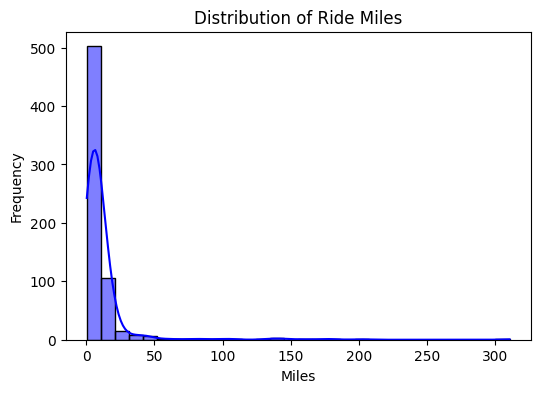

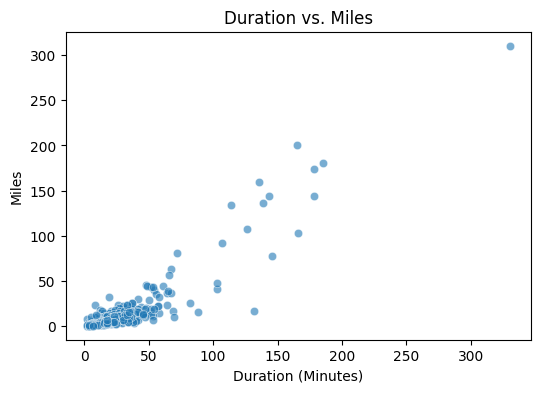

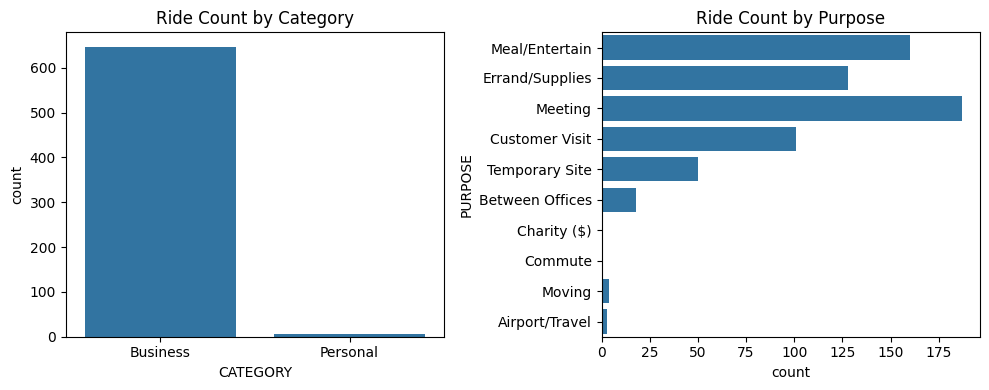


Original feature count: 14

Training model WITHOUT PCA...
Training model WITH PCA...
PCA reduced features to 11, explaining 95.47% variance

--- Model Performance Comparison ---
                    Model  R² Score       MAE       RMSE
0  Without PCA (14 feats)  0.521593  5.348702   8.186419
1     With PCA (11 feats)  0.158418  7.910243  10.857843


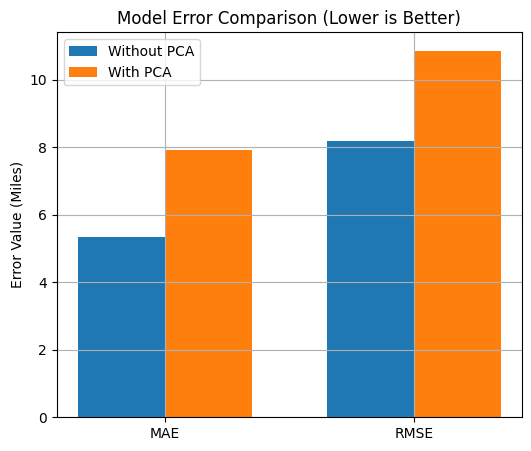

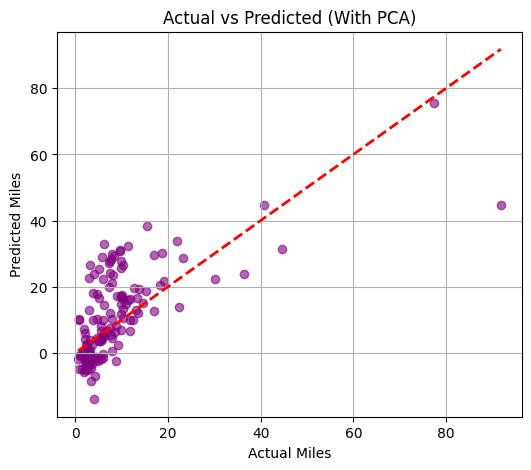

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------------
# This will load your specific UberDataset.xlsx file
try:
    df = pd.read_excel("UberDataset.xlsx")
    dataset_used = "Uber Ride Log Dataset"
except Exception as e:
    print(f"Error loading UberDataset.xlsx: {e}")
    # Exit if the file isn't found
    exit()

print(f"Dataset Loaded Successfully! Using: {dataset_used}")
print("Shape:", df.shape)

# ---------------------------------------------------------------
# 2. Data Cleaning & Feature Engineering
# ---------------------------------------------------------------
# Drop rows with missing values in key columns
df = df.dropna(subset=['START_DATE', 'END_DATE', 'MILES', 'PURPOSE'])

# Convert date columns to datetime objects
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

# Engineer new features
# Calculate duration of the trip in minutes
df['duration_minutes'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60
# Extract time-based features
df['hour_of_day'] = df['START_DATE'].dt.hour
df['day_of_week'] = df['START_DATE'].dt.dayofweek
df['month'] = df['START_DATE'].dt.month

# Clean up impossible values
df = df[df['MILES'] > 0]
df = df[df['duration_minutes'] > 0]

# --- Handle Categorical Features ---
# One-hot encode CATEGORY and PURPOSE columns
df_encoded = pd.get_dummies(df, columns=['CATEGORY', 'PURPOSE'], drop_first=True)

# Select final features and target
# Drop non-numeric or original columns
features_df = df_encoded.drop(
    columns=['START_DATE', 'END_DATE', 'START', 'STOP', 'MILES']
)
target_series = df_encoded['MILES']

print(f"\nAfter Cleaning & Engineering. Features shape: {features_df.shape}")

# ---------------------------------------------------------------
# 3. EDA (Exploratory Data Analysis)
# ---------------------------------------------------------------
print("\n--- Basic Statistics (for MILES) ---")
print(target_series.describe())

# Plot 1: Distribution of Miles
plt.figure(figsize=(6,4))
sns.histplot(target_series, bins=30, kde=True, color='blue')
plt.title("Distribution of Ride Miles")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()

# Plot 2: Duration vs. Miles
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['duration_minutes'], y=df['MILES'], alpha=0.6)
plt.title("Duration vs. Miles")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Miles")
plt.show()

# Plot 3: Ride Counts by Category & Purpose
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='CATEGORY')
plt.title('Ride Count by Category')

plt.subplot(1, 2, 2)
sns.countplot(data=df, y='PURPOSE')
plt.title('Ride Count by Purpose')
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 4. Split features and target
# ---------------------------------------------------------------
# We split *before* scaling to prevent data leakage
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    features_df, target_series, test_size=0.2, random_state=42
)

# ---------------------------------------------------------------
# 5. Scale features
# ---------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

print(f"\nOriginal feature count: {X_train_scaled.shape[1]}")

# ---------------------------------------------------------------
# 6. Model 1 - Without PCA
# ---------------------------------------------------------------
print("\nTraining model WITHOUT PCA...")
lr_no_pca = LinearRegression()
lr_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = lr_no_pca.predict(X_test_scaled)

r2_no_pca = r2_score(y_test, y_pred_no_pca)
mae_no_pca = mean_absolute_error(y_test, y_pred_no_pca)
rmse_no_pca = np.sqrt(mean_squared_error(y_test, y_pred_no_pca))

# ---------------------------------------------------------------
# 7. Model 2 - With PCA
# ---------------------------------------------------------------
print("Training model WITH PCA...")
# We set n_components=0.95 to keep 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance = np.sum(pca.explained_variance_ratio_) * 100
print(f"PCA reduced features to {pca.n_components_}, explaining {explained_variance:.2f}% variance")

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

r2_pca = r2_score(y_test, y_pred_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))

# ---------------------------------------------------------------
# 8. Compare Performance (This is the key requirement)
# ---------------------------------------------------------------
comparison = pd.DataFrame({
    "Model": [f"Without PCA ({X_train_scaled.shape[1]} feats)", f"With PCA ({pca.n_components_} feats)"],
    "R² Score": [r2_no_pca, r2_pca],
    "MAE": [mae_no_pca, mae_pca],
    "RMSE": [rmse_no_pca, rmse_pca]
})

print("\n--- Model Performance Comparison ---")
print(comparison)

# ---------------------------------------------------------------
# 9. Visualization - Comparison Chart
# ---------------------------------------------------------------
# Plotting MAE and RMSE for better comparison
metrics_no_pca = [mae_no_pca, rmse_no_pca]
metrics_pca = [mae_pca, rmse_pca]
labels = ['MAE', 'RMSE']

plt.figure(figsize=(6,5))
bar_width = 0.35
x = np.arange(len(labels))
plt.bar(x - bar_width/2, metrics_no_pca, width=bar_width, label='Without PCA')
plt.bar(x + bar_width/2, metrics_pca, width=bar_width, label='With PCA')
plt.xticks(x, labels)
plt.ylabel("Error Value (Miles)")
plt.title("Model Error Comparison (Lower is Better)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 10. Visualization - Actual vs Predicted (With PCA)
# ---------------------------------------------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_pca, color="purple", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Miles")
plt.ylabel("Predicted Miles")
plt.title("Actual vs Predicted (With PCA)")
plt.grid(True)
plt.show()

Dataset Loaded Successfully! Shape: (1000, 4)
Using Features: ['area', 'bedrooms', 'location']

Train size: (800, 3), Test size: (200, 3)

--- Model Evaluation (Single Train-Test Split) ---
R² Score (log) : 0.9934
MAE (original) : 644300.73
RMSE (original): 814696.84

--- 5-Fold Cross Validation Results ---
R² per fold (log): [0.9934 0.9933 0.9928 0.993  0.9935]
MAE per fold (log): [0.0409 0.0398 0.0379 0.0424 0.0399]
RMSE per fold (log): [0.0545 0.051  0.0557 0.0572 0.0548]

Average Cross Validation Results:
Average R² (log)  : 0.9932
Average MAE (log) : 0.0402
Average RMSE (log): 0.0547


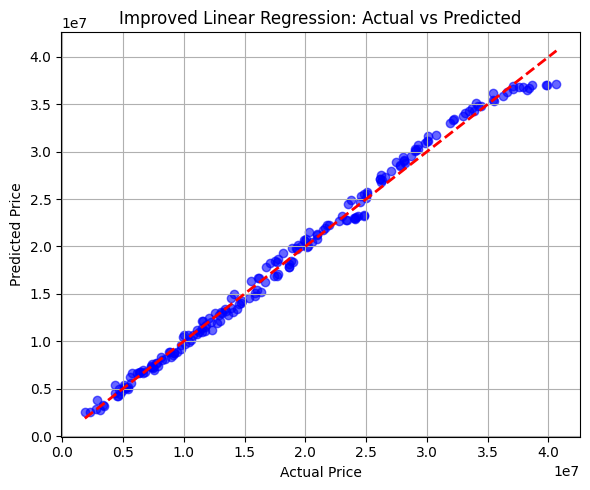


Predicted Price for sample house: ₹20942570.33


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------------
try:
    df = pd.read_csv("house.csv")
    print("Dataset Loaded Successfully! Shape:", df.shape)
except FileNotFoundError:
    print("Error: house.csv not found.")
    exit()

# ---------------------------------------------------------------
# 2. Clean and Standardize Data
# ---------------------------------------------------------------
df = df.dropna()

# *** NEW: Standardize all column names to lowercase ***
df.columns = df.columns.str.lower()

# *** NEW: Convert categorical column 'location' to lowercase ***
df['location'] = df['location'].str.lower()

# Check for the required columns
required_cols = {'area', 'bedrooms', 'location', 'price'}
if not required_cols.issubset(df.columns):
    print(f"Error: Missing columns. Found: {df.columns.tolist()}")
    print(f"Expected: {list(required_cols)}")
    exit()

# ---------------------------------------------------------------
# 3. Define Features and Target
# ---------------------------------------------------------------
X = df[["area", "bedrooms", "location"]]
y = np.log1p(df["price"])  # Log transformation of target
print(f"Using Features: {X.columns.tolist()}")

# ---------------------------------------------------------------
# 4. Preprocessing (Encoding + Scaling)
# ---------------------------------------------------------------
# *** UPDATED: 'bedrooms' is now a numeric feature ***
numeric_features = ["area", "bedrooms"]
categorical_features = ["location"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep any other columns (though there are none)
)

# ---------------------------------------------------------------
# 5. Polynomial + Linear Regression Pipeline
# ---------------------------------------------------------------
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", LinearRegression())
])

# ---------------------------------------------------------------
# 6. Train-Test Split
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTrain size: {X_train.shape}, Test size: {X_test.shape}")

# ---------------------------------------------------------------
# 7. Train Model
# ---------------------------------------------------------------
model.fit(X_train, y_train)

# ---------------------------------------------------------------
# 8. Evaluate on Test Data
# ---------------------------------------------------------------
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Revert log scale
y_test_original = np.expm1(y_test)

r2 = r2_score(y_test, y_pred_log)
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print("\n--- Model Evaluation (Single Train-Test Split) ---")
print(f"R² Score (log) : {r2:.4f}")
print(f"MAE (original) : {mae:.2f}")
print(f"RMSE (original): {rmse:.2f}")

# ---------------------------------------------------------------
# 9. 5-Fold Cross Validation
# ---------------------------------------------------------------
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_r2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')
cv_mae_log = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
cv_rmse_log = np.sqrt(-cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error'))

print("\n--- 5-Fold Cross Validation Results ---")
print("R² per fold (log):", np.round(cv_r2, 4))
print("MAE per fold (log):", np.round(cv_mae_log, 4))
print("RMSE per fold (log):", np.round(cv_rmse_log, 4))

print("\nAverage Cross Validation Results:")
print(f"Average R² (log)  : {np.mean(cv_r2):.4f}")
print(f"Average MAE (log) : {np.mean(cv_mae_log):.4f}")
print(f"Average RMSE (log): {np.mean(cv_rmse_log):.4f}")

# ---------------------------------------------------------------
# 10. Visualization - Actual vs Predicted Prices
# ---------------------------------------------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test_original, y_pred, color='blue', alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2)
plt.title("Improved Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 11. Predict Example
# ---------------------------------------------------------------
# *** UPDATED: Example now uses 'bedrooms' ***
sample_house = pd.DataFrame({
    "area": [2600],
    "bedrooms": [3],
    "location": ["urban"] # e.g., 'urban', 'suburban' (must be lowercase)
})

predicted_price = np.expm1(model.predict(sample_house))[0]
print(f"\nPredicted Price for sample house: ₹{predicted_price:.2f}")

Dataset Loaded Successfully! Shape: (200, 6)
  student_id  hours_studied  sleep_hours  attendance_percent  Internal_marks  \
0       S001            8.0          8.8                72.1              45   
1       S002            1.3          8.6                60.7              55   
2       S003            4.0          8.2                73.7              86   
3       S004            3.5          4.8                95.1              66   
4       S005            9.1          6.4                89.8              71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  

Estimated Parameters:
Slope (m): 1.6341
Intercept (b): 23.6184

Model Evaluation:
Mean Squared Error (MSE): 18.1937
R² Score: 0.6033


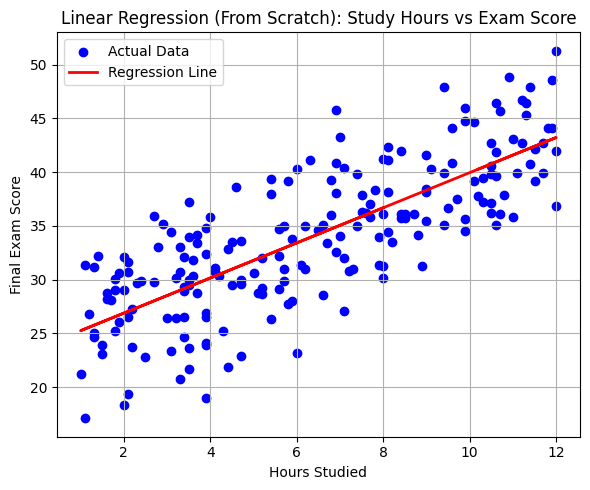


Predicted Exam Score for 8 hours of study: 36.69


In [ ]:
#ASS12. Build a Linear Regression model from scratch to predict students’ final exam scores based on
#their study hours. Implement all computations manually (without using built-in regression
#libraries) — including parameter estimation, prediction, and model evaluation using Mean
#Squared Error (MSE) and R2 Score.

# ================================================================
# Problem: Linear Regression (From Scratch)
# Goal: Predict students' exam scores based on study hours
# Evaluation: MSE and R² Score
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------------
df = pd.read_csv("exam.csv")
print("Dataset Loaded Successfully! Shape:", df.shape)
print(df.head())

# We'll use only study hours and exam score
X = df["hours_studied"].values
y = df["exam_score"].values

# ---------------------------------------------------------------
# 2. Implement Linear Regression From Scratch
# ---------------------------------------------------------------

# Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(y)

# Calculate slope (m) and intercept (b)
numerator = np.sum((X - mean_x) * (y - mean_y))
denominator = np.sum((X - mean_x) ** 2)
m = numerator / denominator
b = mean_y - m * mean_x

print("\nEstimated Parameters:")
print(f"Slope (m): {m:.4f}")
print(f"Intercept (b): {b:.4f}")

# ---------------------------------------------------------------
# 3. Make Predictions
# ---------------------------------------------------------------
y_pred = m * X + b

# ---------------------------------------------------------------
# 4. Evaluate Model (Manual MSE and R²)
# ---------------------------------------------------------------

# Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)

# R² Score
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# ---------------------------------------------------------------
# 5. Visualization
# ---------------------------------------------------------------
plt.figure(figsize=(6,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Linear Regression (From Scratch): Study Hours vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Final Exam Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 6. Predict Example (New Student)
# ---------------------------------------------------------------
new_hours = 8
predicted_score = m * new_hours + b
print(f"\nPredicted Exam Score for {new_hours} hours of study: {predicted_score:.2f}")

Dataset Loaded Successfully! Shape: (200, 6)
  student_id  hours_studied  sleep_hours  attendance_percent  Internal_marks  \
0       S001            8.0          8.8                72.1              45   
1       S002            1.3          8.6                60.7              55   
2       S003            4.0          8.2                73.7              86   
3       S004            3.5          4.8                95.1              66   
4       S005            9.1          6.4                89.8              71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  

Train Size: (160, 3), Test Size: (40, 3)

--- Model Evaluation (Single Train-Test Split) ---
R² Score : 0.7918
MAE      : 2.833
RMSE     : 3.324

--- 5-Fold Cross Validation Results ---
R² per fold : [0.7918 0.81   0.7634 0.7805 0.8252]
MAE per fold: [2.833 2.461 2.629 2.369 2.524]
RMSE per fold: [3.324 2.915 3.227 2.88  2.915]

Average CV Results:
Average R²  : 0.7942
Avera

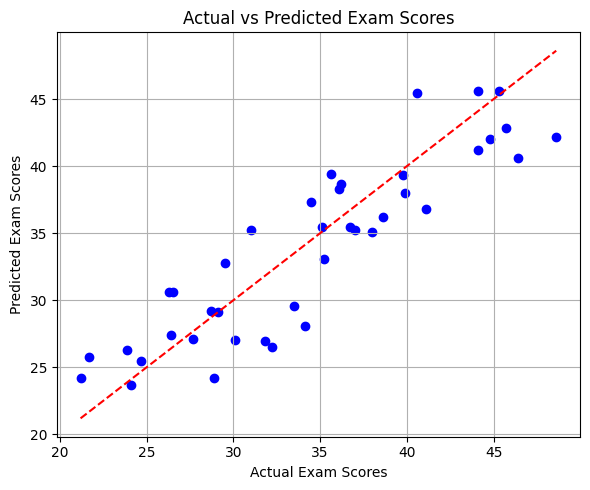


Predicted Exam Score for new student: 39.8


In [ ]:
#ASS13. Build a Linear Regression model to predict students’ exam scores using study hours, attendance,
#and internal marks. Validate model accuracy using K-Fold Cross-Validation.

# ===============================================================
# Problem 13: Exam Score Prediction using Linear Regression
# Features: Study Hours, Attendance, Internal Marks
# Validation: K-Fold Cross Validation
# ===============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------------
df = pd.read_csv("exam.csv")
print("Dataset Loaded Successfully! Shape:", df.shape)
print(df.head())

# ---------------------------------------------------------------
# 2. Feature and Target Selection
# ---------------------------------------------------------------
# Use relevant columns
X = df[["hours_studied", "attendance_percent", "Internal_marks"]]
y = df["exam_score"]

# ---------------------------------------------------------------
# 3. Train-Test Split
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTrain Size: {X_train.shape}, Test Size: {X_test.shape}")

# ---------------------------------------------------------------
# 4. Train Linear Regression Model
# ---------------------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------------------------------------------
# 5. Predict and Evaluate on Test Data
# ---------------------------------------------------------------
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Model Evaluation (Single Train-Test Split) ---")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.3f}")
print(f"RMSE     : {rmse:.3f}")

# ---------------------------------------------------------------
# 6. K-Fold Cross Validation
# ---------------------------------------------------------------
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')
cv_mae = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
cv_rmse = np.sqrt(-cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error'))

print("\n--- 5-Fold Cross Validation Results ---")
print("R² per fold :", np.round(cv_r2, 4))
print("MAE per fold:", np.round(cv_mae, 3))
print("RMSE per fold:", np.round(cv_rmse, 3))

print("\nAverage CV Results:")
print(f"Average R²  : {np.mean(cv_r2):.4f}")
print(f"Average MAE : {np.mean(cv_mae):.3f}")
print(f"Average RMSE: {np.mean(cv_rmse):.3f}")

# ---------------------------------------------------------------
# 7. Visualization: Actual vs Predicted Exam Scores
# ---------------------------------------------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Exam Scores")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 8. Forecast Example (New Student)
# ---------------------------------------------------------------
new_student = pd.DataFrame({
    "hours_studied": [8],
    "attendance_percent": [85],
    "Internal_marks": [80]
})
predicted_score = model.predict(new_student)
print("\nPredicted Exam Score for new student:", round(predicted_score[0], 2))

Dataset Loaded Successfully! Shape: (375, 6)
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

--- Model Evaluation (Single Train-Test Split) ---
R² Score : 0.8936
MAE      : 11508.25
RMSE     : 15974.63

--- 5-Fold Cross Validation Results ---
R² per fold: [0.8936 0.8618 0.8942 0.8979 0.8585]
MAE per fold: [11508.25 11529.54 11047.84 11874.25 13086.53]
RMSE per fold: [15974.63 16172.62 15837.95 15726.44 18650.05]

Average CV Results:
Average R²  : 0.8812
Average MAE : 11809.28
Average RMSE: 16472.34


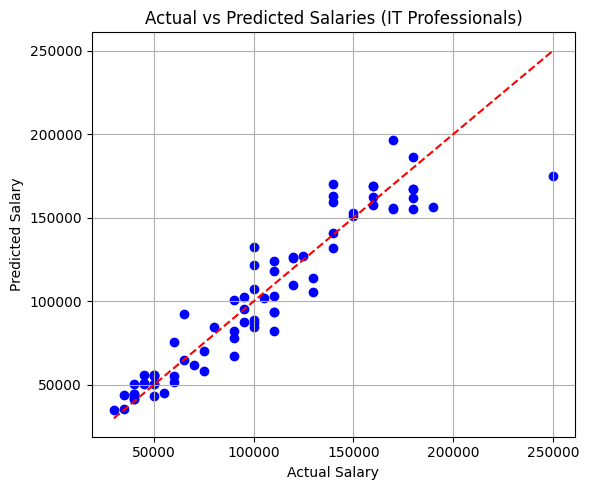


Predicted Salary for 10 years experience (Master’s, Software Engineer): 87313.03


In [ ]:
#ASS14. Develop a Linear Regression model to estimate IT professionals’ salaries based on experience,
#education, and skills. Evaluate performance using 5-Fold Cross-Validation.

# ================================================================
# IT Professionals' Salary Prediction using Linear Regression
# Features: Experience, Education, Skills
# Validation: 5-Fold Cross Validation
# ================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------------
df = pd.read_excel("salary.xlsx")
print("Dataset Loaded Successfully! Shape:", df.shape)
print(df.head())

# ---------------------------------------------------------------
# 2. Data Preprocessing
# ---------------------------------------------------------------
# Drop irrelevant or highly specific columns (like Name/ID if any)
df = df.dropna()  # Remove missing values if present

# Encode categorical columns (Gender, Education Level, Job Title)
le = LabelEncoder()
for col in ["Gender", "Education Level", "Job Title"]:
    df[col] = le.fit_transform(df[col])

# ---------------------------------------------------------------
# 3. Define Features (X) and Target (y)
# ---------------------------------------------------------------
# We'll use Experience, Education, and Job Title (skill proxy) as predictors
X = df[["Years of Experience", "Education Level", "Job Title"]]
y = df["Salary"]

# ---------------------------------------------------------------
# 4. Train-Test Split
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------------------
# 5. Train Linear Regression Model
# ---------------------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------------------------------------------
# 6. Predict and Evaluate on Test Data
# ---------------------------------------------------------------
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Model Evaluation (Single Train-Test Split) ---")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"RMSE     : {rmse:.2f}")

# ---------------------------------------------------------------
# 7. 5-Fold Cross Validation
# ---------------------------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
cv_mae = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))

print("\n--- 5-Fold Cross Validation Results ---")
print("R² per fold:", np.round(cv_r2, 4))
print("MAE per fold:", np.round(cv_mae, 2))
print("RMSE per fold:", np.round(cv_rmse, 2))

print("\nAverage CV Results:")
print(f"Average R²  : {np.mean(cv_r2):.4f}")
print(f"Average MAE : {np.mean(cv_mae):.2f}")
print(f"Average RMSE: {np.mean(cv_rmse):.2f}")

# ---------------------------------------------------------------
# 8. Visualization — Actual vs Predicted Salaries
# ---------------------------------------------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Salaries (IT Professionals)")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 9. Forecast Example
# ---------------------------------------------------------------
new_data = pd.DataFrame({
    "Years of Experience": [10],
    "Education Level": [le.fit_transform(["Master's"])[0]],
    "Job Title": [le.fit_transform(["Software Engineer"])[0]]
})
forecast = model.predict(new_data)
print("\nPredicted Salary for 10 years experience (Master’s, Software Engineer):", round(forecast[0], 2))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# -------------------- 1. Load and Process Dataset --------------------
# --- MODIFIED SECTION ---

# *** REPLACE "your_file.csv" WITH YOUR ACTUAL FILENAME ***
file_name = "spends.csv"

try:
    # Try reading as CSV, if it fails, try Excel
    try:
        df = pd.read_csv(file_name)
    except (UnicodeDecodeError, pd.errors.ParserError):
        df = pd.read_excel(file_name)

    # --- Convert Transaction_Date to datetime object ---
    df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

    # --- AGGREGATE BY WEEK INSTEAD OF MONTH ---
    # This is the main fix: 'ME' (Month End) is changed to 'W' (Week End)
    # This gives us more data points to train on.
    df_weekly = df.set_index('Transaction_Date').resample('W').agg({
        'Revenue': 'sum',
        'Ad_Spend': 'sum',
        'Discount_Applied': 'mean',
        'Clicks': 'sum'
    })

    # --- Rename columns to match the script's logic ---
    df_weekly = df_weekly.rename(columns={
        'Revenue': 'WeeklySales',
        'Ad_Spend': 'AdSpend',
        'Discount_Applied': 'Discount',
        'Clicks': 'CustomerFootfall'
    })

    # Drop any weeks that might have missing data
    df_weekly = df_weekly.dropna()

    print("--- Aggregated Weekly Dataset ---")
    print(f"Total data points (weeks): {len(df_weekly)}")
    print(df_weekly.head())

except FileNotFoundError:
    print(f"Error: Dataset file '{file_name}' not found.")
    print("Please make sure the file is in the same directory as your script.")
    exit()
except KeyError as e:
    print(f"Error: A required column is missing: {e}")
    print("Please ensure your file has 'Transaction_Date', 'Revenue', 'Ad_Spend', 'Discount_Applied', and 'Clicks'.")
    exit()
# --- END MODIFIED SECTION ---


# -------------------- 2. Feature and Target Selection --------------------
# We now predict WeeklySales
X = df_weekly[['AdSpend', 'Discount', 'CustomerFootfall']]
y = df_weekly['WeeklySales']

# -------------------- 3. Split Data --------------------
# We can now safely split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------- 4. Train Linear Regression Model --------------------
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# -------------------- 5. Model Evaluation (Single Split) --------------------
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Performance (Single Train-Test Split):")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# -------------------- 6. Apply 5-Fold Cross Validation --------------------
# We now have enough data for 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))
cv_mae = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

print("\n5-Fold Cross Validation Results (More Reliable):")
print(f"R² Scores per fold: {np.round(cv_r2, 3)}")
print(f"Average R²: {np.mean(cv_r2):.4f}")
print(f"Average RMSE: {np.mean(cv_rmse):.2f}")
print(f"Average MAE: {np.mean(cv_mae):.2f}")


# -------------------- 7. Forecast for Next Week --------------------
# Note: The input values now represent a single WEEK's data
new_data = pd.DataFrame({'AdSpend': [7000], 'Discount': [0.15], 'CustomerFootfall': [4000]})
forecast = model.predict(new_data)
print(f"\nForecasted Sales for Next Week: ${forecast[0]:.2f}")

--- Aggregated Weekly Dataset ---
Total data points (weeks): 53
                  WeeklySales    AdSpend  Discount  CustomerFootfall
Transaction_Date                                                    
2023-12-10          607382.79  119673.59  0.146215             26817
2023-12-17         1034778.27  208391.23  0.151090             45812
2023-12-24         1023659.05  208201.39  0.153934             47523
2023-12-31         1057249.66  208186.80  0.148933             46060
2024-01-07         1121767.46  215907.09  0.151426             47756

Model Performance (Single Train-Test Split):
R² Score: 0.2302
RMSE: 28426.85
MAE: 24085.72

5-Fold Cross Validation Results (More Reliable):
R² Scores per fold: [ 0.296 -0.105  0.96   0.811  0.447]
Average R²: 0.4817
Average RMSE: 40496.48
Average MAE: 26768.96

Forecasted Sales for Next Week: $61948.62


In [ ]:
# -------------------- 7. Forecast for Next Week --------------------
# --- FIXED ---
# Values are now realistic and in the same range as the training data
new_data = pd.DataFrame({
    'AdSpend': [210000],
    'Discount': [0.10],
    'CustomerFootfall': [46000]
})

forecast = model.predict(new_data)
print(f"\nForecasted Sales for Next Week: ${forecast[0]:.2f}")


Forecasted Sales for Next Week: $1160325.89


In [ ]:
import pandas as pd

# --- REPLACE THIS WITH YOUR FILE NAME ---
file_name = "spends.csv"  # Or "your_file.xlsx"
# ----------------------------------------

try:
    # First, try to read as a CSV
    df = pd.read_csv(file_name)
except (UnicodeDecodeError, pd.errors.ParserError):
    # If CSV fails, try to read as an Excel file
    try:
        df = pd.read_excel(file_name)
    except Exception as e:
        print(f"Failed to read as CSV or Excel. Error: {e}")
        exit()
except FileNotFoundError:
    print(f"Error: File not found at '{file_name}'")
    print("Please make sure the file is in the same directory as your script.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# If successful, print the first 5 rows and the column list
print("--- First 5 Rows of your file ---")
print(df.head())
print("\n--- List of Column Names ---")
print(df.columns.tolist())

--- First 5 Rows of your file ---
                         Transaction_ID     Customer_ID   Product_ID  \
0  8b460852-7c64-46fa-998b-b0976879d082     Customer_65  Product_224   
1  418612e7-8744-4ba3-bb0c-105b47e2a968   Customer_1910  Product_584   
2  5bc3b98f-cb0c-4b12-947c-df8bbb35a73e   Customer_2306  Product_374   
3  28fb67c8-e8c0-447a-841c-f760730de0eb  Customer_17206  Product_220   
4  8bee087a-a8a9-45bb-89d7-04d1710f1b00  Customer_16033  Product_358   

  Transaction_Date  Units_Sold  Discount_Applied  Revenue  Clicks  \
0       2024-10-06         134              0.14   305.54      11   
1       2024-10-29         109              0.30  1102.19      15   
2       2024-04-04         116              0.04   471.29      16   
3       2024-08-25         125              0.20   980.26      12   
4       2024-05-05         132              0.07   803.76      44   

   Impressions  Conversion_Rate         Category         Region  Ad_CTR  \
0           65             0.17      Electr